### Global mean temperature changes in the CESM1 and CESM2 single forcing large ensembles

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from CASutils import averaging_utils as avg

In [2]:
landfrac = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/ocn_wgts/LANDFRAC_LENS2.nc")

In [3]:
plotpath='/project/cas/islas/python_plots/singleforcing_paper/figures/'

### CESM1

In [4]:
basepath='/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS1/'
all1 = xr.open_dataset(basepath+'LENS1_TREFHT_am.nc')
all1['lon'] = landfrac.lon ; all1['lat'] = landfrac.lat
all1m = all1.mean('M') ; del(all1)

basepath='/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS1-SF/'
xaer1 = xr.open_dataset(basepath+'XAER_TREFHT_am.nc')
xaer1['lon'] = landfrac.lon ; xaer1['lat'] = landfrac.lat
xaer1m = xaer1.mean('M') ; del(xaer1)

xghg1 = xr.open_dataset(basepath+'XGHG_TREFHT_am.nc')
xghg1['lon'] = landfrac.lon ; xghg1['lat'] = landfrac.lat
xghg1m = xghg1.mean('M') ; del(xghg1)

xbmb1 = xr.open_dataset(basepath+'XBMB_TREFHT_am.nc')
xbmb1['lon'] = landfrac.lon ; xbmb1['lat'] = landfrac.lat
xbmb1m = xbmb1.mean('M') ; del(xbmb1)

### CESM2

In [5]:
basepath='/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2/'
all2 = xr.open_dataset(basepath+'LENS2_TREFHT_am.nc')
all2['lon'] = landfrac.lon ; all2['lat'] = landfrac.lat
all2m = all2.mean('M') ; del(all2)

basepath='/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2-SF/'
aer2 = xr.open_dataset(basepath+'AAER_TREFHT_am.nc')
aer2['lon'] = landfrac.lon ; aer2['lat'] = landfrac.lat
aer2m = aer2.mean('M') ; del(aer2)

ghg2 = xr.open_dataset(basepath+'GHG_TREFHT_am.nc')
ghg2['lon'] = landfrac.lon ; ghg2['lat'] = landfrac.lat
ghg2m = ghg2.mean('M') ; del(ghg2)

bmb2 = xr.open_dataset(basepath+'BMB_TREFHT_am.nc')
bmb2['lon'] = landfrac.lon ; bmb2['lat'] = landfrac.lat
bmb2m = bmb2.mean('M') ; del(bmb2)

ee2 = xr.open_dataset(basepath+'EE_TREFHT_am.nc')
ee2['lon'] = landfrac.lon ; ee2['lat'] = landfrac.lat
ee2m = ee2.mean('M') ; del(ee2)

### Calculate and subtract the baseline period

In [6]:
all1base = all1m.sel(year=slice(1920,1940)).mean('year')
xaer1base = xaer1m.sel(year=slice(1920,1940)).mean('year')
xghg1base = xghg1m.sel(year=slice(1920,1940)).mean('year')
xbmb1base = xbmb1m.sel(year=slice(1920,1940)).mean('year')

all2base = all2m.sel(year=slice(1920,1940)).mean('year')
aer2base = aer2m.sel(year=slice(1920,1940)).mean('year')
ghg2base = ghg2m.sel(year=slice(1920,1940)).mean('year')
bmb2base = bmb2m.sel(year=slice(1920,1940)).mean('year')
ee2base = ee2m.sel(year=slice(1920,1940)).mean('year')

all1m = all1m - all1base
xaer1m = xaer1m - xaer1base
xghg1m = xghg1m - xghg1base
xbmb1m = xbmb1m - xbmb1base

all2m = all2m - all2base
aer2m = aer2m - aer2base
ghg2m = ghg2m - ghg2base
bmb2m = bmb2m - bmb2base
ee2m = ee2m - ee2base

### Calculate the forcing influence from the X-Runs

In [7]:
aer1xway = all1m - xaer1m
ghg1xway = all1m - xghg1m
bmb1xway = all1m - xbmb1m

### Calculate global means

In [8]:
all1gm = avg.cosweightlonlat(all1m, 0, 360, -90, 90).compute()
aer1xwaygm = avg.cosweightlonlat(aer1xway, 0, 360, -90, 90).compute()
ghg1xwaygm = avg.cosweightlonlat(ghg1xway, 0, 360, -90, 90).compute()
bmb1xwaygm = avg.cosweightlonlat(bmb1xway, 0, 360, -90, 90).compute()

all2gm = avg.cosweightlonlat(all2m, 0, 360, -90, 90).compute()
aer2gm = avg.cosweightlonlat(aer2m, 0, 360, -90, 90).compute()
ghg2gm = avg.cosweightlonlat(ghg2m, 0, 360, -90, 90).compute()
bmb2gm = avg.cosweightlonlat(bmb2m, 0, 360, -90, 90).compute()
ee2gm = avg.cosweightlonlat(ee2m, 0, 360, -90, 90).compute()

### Read in bootstrap uncertainty ranges (~/DATA_SORT/BOOTSTRAP/fig2/bootstrap_cesm1.py)

In [9]:
boot_lens1 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/BOOTSTRAP/fig2/CESM1_TREFHTgm_boot_all_ghg_aaer.nc")
boot_lens1_withbmb = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/BOOTSTRAP/fig2/CESM1_TREFHTgm_boot_ee_bmb.nc")
boot_lens2 = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/BOOTSTRAP/fig2/CESM2_TREFHTgm_boot.nc")

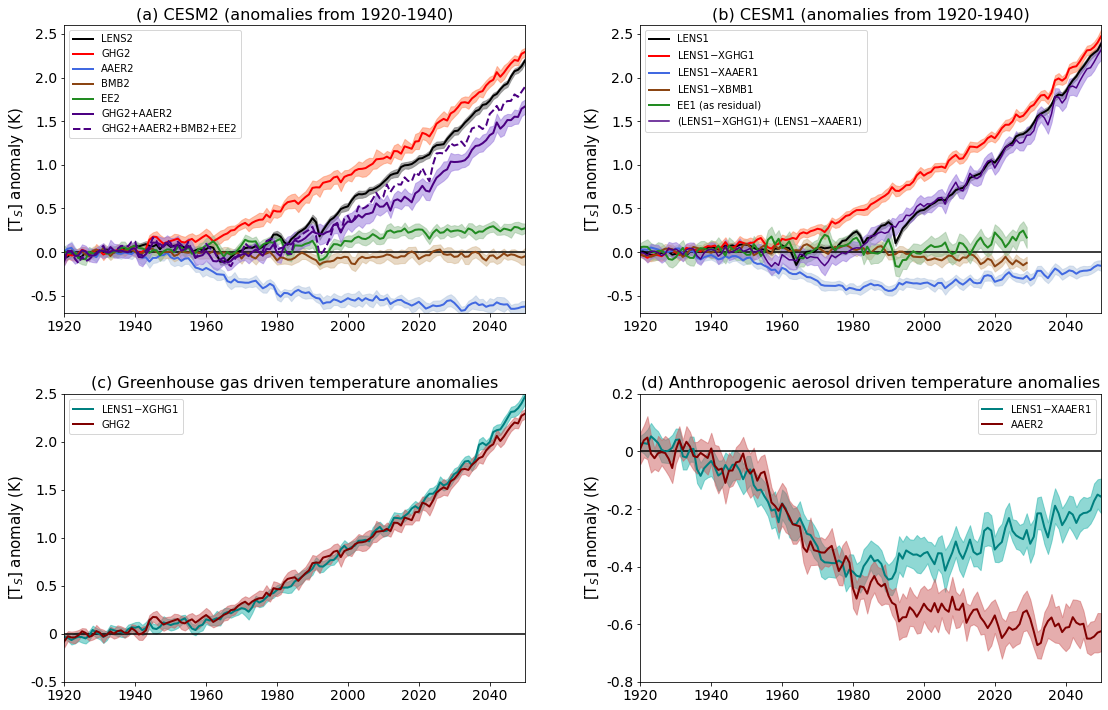

In [10]:
fig = plt.figure(figsize=(16,16))


ax = fig.add_axes([0.05,0.7,0.4,0.25])
ax.set_xlim(1920,2050)
ax.set_ylim(-0.7,2.6)
ax.plot([1920,2050],[0,0], color='black')
ax.set_yticks([-0.5,0,0.5,1,1.5,2,2.5])
ax.set_yticklabels(['-0.5','0.0','0.5','1.0','1.5','2.0','2.5'], fontsize=14)
ax.set_ylabel('[T$_{S}$] anomaly (K)', fontsize=15)
ax.set_xticks([1920,1940,1960,1980,2000,2020,2040])
ax.set_xticklabels(['1920','1940','1960','1980','2000','2020','2040'], fontsize=14)
ax.set_title('(a) CESM2 (anomalies from 1920-1940)', fontsize=16)

ax.fill_between(boot_lens2.year, boot_lens2.min95all, boot_lens2.max95all, color='gray', alpha=0.7)
ax.plot(all2gm.year, all2gm.TREFHT, linewidth=2, color='black', label='LENS2')

ax.fill_between(boot_lens2.year, boot_lens2.min95ghg, boot_lens2.max95ghg, color='coral', alpha=0.5)
ax.plot(ghg2gm.year, ghg2gm.TREFHT, linewidth=2, color='red', label='GHG2')

ax.fill_between(boot_lens2.year, boot_lens2.min95aer, boot_lens2.max95aer, color='lightsteelblue', alpha=0.5)
ax.plot(aer2gm.year, aer2gm.TREFHT, linewidth=2, color='royalblue', label='AAER2')

ax.fill_between(boot_lens2.year, boot_lens2.min95bmb, boot_lens2.max95bmb, color='tan', alpha=0.5)
ax.plot(bmb2gm.year, bmb2gm.TREFHT, linewidth=2, color='saddlebrown', label='BMB2')

ax.fill_between(boot_lens2.year, boot_lens2.min95ee, boot_lens2.max95ee, color='darkseagreen', alpha=0.5)
ax.plot(ee2gm.year, ee2gm.TREFHT, linewidth=2, color='forestgreen', label='EE2')

ax.fill_between(boot_lens2.year, boot_lens2.min95ghgplusaer, boot_lens2.max95ghgplusaer, color='mediumpurple', alpha=0.5)
ax.plot(ghg2gm.year, ghg2gm.TREFHT + aer2gm.TREFHT, linewidth=2, color='indigo', label='GHG2+AAER2')

ax.plot(ghg2gm.year, ghg2gm.TREFHT + aer2gm.TREFHT + bmb2gm.TREFHT + ee2gm.TREFHT, color='indigo', 
        linewidth=2, linestyle='dashed', label='GHG2+AAER2+BMB2+EE2')
            
ax.legend()



ax = fig.add_axes([0.55,0.7,0.4,0.25])
ax.set_xlim(1920,2050)
ax.set_ylim(-0.7,2.6)
ax.plot([1920,2050],[0,0], color='black')
ax.set_yticks([-0.5,0,0.5,1,1.5,2,2.5])
ax.set_yticklabels(['-0.5','0.0','0.5','1.0','1.5','2.0','2.5'], fontsize=14)
ax.set_ylabel('[T$_{S}$] anomaly (K)', fontsize=15)
ax.set_xticks([1920,1940,1960,1980,2000,2020,2040])
ax.set_xticklabels(['1920','1940','1960','1980','2000','2020','2040'], fontsize=14)
ax.set_title('(b) CESM1 (anomalies from 1920-1940)', fontsize=16)

ax.fill_between(boot_lens1.year, boot_lens1.min95all, boot_lens1.max95all, color='gray', alpha=0.7)
ax.plot(all1gm.year, all1gm.TREFHT, linewidth=2, color='black', label='LENS1')

ax.fill_between(boot_lens1.year, boot_lens1.min95ghg, boot_lens1.max95ghg, color='coral', alpha=0.5)
ax.plot(ghg1xwaygm.year, ghg1xwaygm.TREFHT, linewidth=2, color='red', label='LENS1$-$XGHG1')

ax.fill_between(boot_lens1.year, boot_lens1.min95aer, boot_lens1.max95aer, color='lightsteelblue', alpha=0.5)
ax.plot(aer1xwaygm.year, aer1xwaygm.TREFHT, linewidth=2, color='royalblue', label='LENS1$-$XAAER1')

ax.fill_between(boot_lens1_withbmb.year, boot_lens1_withbmb.min95bmb, boot_lens1_withbmb.max95bmb, color='tan', alpha=0.5)
ax.plot(bmb1xwaygm.year, bmb1xwaygm.TREFHT, linewidth=2, color='saddlebrown', label='LENS1$-$XBMB1')

ax.fill_between(boot_lens1_withbmb.year, boot_lens1_withbmb.min95ee, boot_lens1_withbmb.max95ee, color='darkseagreen', alpha=0.5)
ax.plot(bmb1xwaygm.year, all1gm.TREFHT - (aer1xwaygm.TREFHT + ghg1xwaygm.TREFHT + bmb1xwaygm.TREFHT), 
        linewidth=2, color='forestgreen', label='EE1 (as residual)')

ax.fill_between(boot_lens1.year, boot_lens1.min95ghgplusaer, boot_lens1.max95ghgplusaer, color='mediumpurple', alpha=0.5)
ax.plot(ghg1xwaygm.year, (ghg1xwaygm.TREFHT + aer1xwaygm.TREFHT), color='indigo', label='(LENS1$-$XGHG1)+ (LENS1$-$XAAER1)')

ax.legend()


    
ax = fig.add_axes([0.05,0.38,0.4,0.25])
ax.set_xlim(1920,2050)
ax.set_xticks([1920,1940,1960,1980,2000,2020,2040])
ax.set_xticklabels(['1920','1940','1960','1980','2000','2020','2040'], fontsize=14)
ax.set_ylim(-0.5,2.5)
ax.set_yticks([-0.5,0,0.5,1,1.5,2,2.5])
ax.set_yticklabels(['-0.5','0','0.5','1.0','1.5','2.0','2.5'], fontsize=14)
ax.set_ylabel('[T$_{S}$] anomaly (K)', fontsize=15)
ax.set_title('(c) Greenhouse gas driven temperature anomalies', fontsize=16)
ax.plot([1920,2050],[0,0], color='black')

ax.fill_between(boot_lens1.year, boot_lens1.min95ghg, boot_lens1.max95ghg, color='lightseagreen', alpha=0.5)
ax.plot(ghg1xwaygm.year, ghg1xwaygm.TREFHT, linewidth=2, color='teal', label='LENS1$-$XGHG1')

ax.fill_between(boot_lens2.year, boot_lens2.min95ghg, boot_lens2.max95ghg, color='indianred', alpha=0.5)
ax.plot(ghg2gm.year, ghg2gm.TREFHT, linewidth=2, color='maroon', label='GHG2')

ax.legend()

ax = fig.add_axes([0.55,0.38,0.4,0.25])
ax.set_xlim(1920,2050)
ax.set_xticks([1920,1940,1960,1980,2000,2020,2040])
ax.set_xticklabels(['1920','1940','1960','1980','2000','2020','2040'], fontsize=14)
ax.set_ylim(-0.8,0.2)
ax.set_yticks([-0.8,-0.6,-0.4,-0.2,0,0.2])
ax.set_yticklabels(['-0.8','-0.6','-0.4','-0.2','0','0.2'], fontsize=14)
ax.set_ylabel('[T$_{S}$] anomaly (K)', fontsize=15)
ax.set_title('(d) Anthropogenic aerosol driven temperature anomalies', fontsize=16)
ax.plot([1920,2050],[0,0], color='black')

ax.fill_between(boot_lens1.year, boot_lens1.min95aer, boot_lens1.max95aer, color='lightseagreen', alpha=0.5)
ax.plot(aer1xwaygm.year, aer1xwaygm.TREFHT, linewidth=2, color='teal', label='LENS1$-$XAAER1')

ax.fill_between(boot_lens2.year, boot_lens2.min95aer, boot_lens2.max95aer, color='indianred', alpha=0.5)
ax.plot(aer2gm.year, aer2gm.TREFHT, linewidth=2, color='maroon', label='AAER2')

ax.legend(loc='upper right')

fig.savefig(plotpath+'fig2.png', bbox_inches='tight', facecolor='white')
fig.savefig(plotpath+'fig2.pdf', bbox_inches='tight', facecolor='white')